<a href="https://colab.research.google.com/github/ydydydydydy/Colab/blob/main/ex03_%ED%99%9C%EC%84%B1%ED%99%94%ED%95%A8%EC%88%98%2C%EC%B5%9C%EC%A0%81%ED%99%94%ED%95%A8%EC%88%98%2Ccallback%ED%95%A8%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 활성화함수와 경사하강법 최적의 조합을 확인해보자
- 모델링에 도움이 되는 callback 함수(모델저장, 조기학습중단) 을 알아보자!

##### 데이터 로딩

In [1]:
from tensorflow.keras.datasets import mnist # 손글씨 데이터

In [2]:
# 데이터 분리
(X_train,y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# 크기확인
(X_train.shape,y_train.shape), (X_test.shape,y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

### 활성화 함수와 경사하강법 조합에 따른 성능비교
1. sigmoid + SGD 조합
2. relu + SGD 조합
3. relu + Adam 조합

In [4]:
# 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam # 경사하강법 클래스 사용

In [5]:
# 1. sigmoid + SGD 조합
# 1)신경망설계
# 뼈대
model1 = Sequential()
# 입력층
# 사진데이터 (2차원 -> 1차원)
model1.add(Flatten())
# 중간층 (5층 (64,128,256,128,64))
model1.add(Dense(units = 64, activation = 'sigmoid'))
model1.add(Dense(units = 128, activation = 'sigmoid'))
model1.add(Dense(units = 256, activation = 'sigmoid'))
model1.add(Dense(units = 128, activation = 'sigmoid'))
model1.add(Dense(units = 64, activation = 'sigmoid'))
# 출력층
model1.add(Dense(units = 10, activation = 'softmax'))

In [6]:
#2) 학습방법및 평가방법 설정
model1.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = SGD(learning_rate = 0.01), #SGD 기본학습률: 0.01
               metrics = ['accuracy'])

In [7]:
# 3) 학습  # epochs = 20
h1 = model1.fit(X_train,y_train,epochs = 20,
                validation_split=0.2,
                batch_size = 128)

Epoch 1/20
375/375 [==============================] - 8s 14ms/step - loss: 2.3126 - accuracy: 0.1140 - val_loss: 2.3022 - val_accuracy: 0.1060
Epoch 2/20
375/375 [==============================] - 4s 12ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 3/20
375/375 [==============================] - 4s 12ms/step - loss: 2.3011 - accuracy: 0.1138 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 2.3010 - accuracy: 0.1138 - val_loss: 2.3017 - val_accuracy: 0.1060
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 2.3009 - accuracy: 0.1140 - val_loss: 2.3017 - val_accuracy: 0.1060
Epoch 7/20
375/375 [==============================] - 3s 8ms/step - loss: 2.3008 - accuracy: 0.1140 - val_loss: 2.3011 - val_accuracy: 0.1060
Epo

######2.relu + SGD

In [8]:
# 1)신경망설계
# 뼈대
model2 = Sequential()
# 입력층
# 사진데이터 (2차원 -> 1차원)
model2.add(Flatten())
# 중간층 (5층 (64,128,256,128,64))
model2.add(Dense(units = 64, activation = 'relu'))
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dense(units = 256, activation = 'relu'))
model2.add(Dense(units = 128, activation = 'relu'))
model2.add(Dense(units = 64, activation = 'relu'))
# 출력층
model2.add(Dense(units = 10, activation = 'softmax'))

#2) 학습방법및 평가방법 설정
model2.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = SGD(learning_rate = 0.01), #SGD 기본학습률: 0.01
               metrics = ['accuracy'])

h2 = model2.fit(X_train,y_train,epochs = 20,
                validation_split=0.2,
                batch_size = 128)

Epoch 1/20
375/375 [==============================] - 3s 8ms/step - loss: 1.9368 - accuracy: 0.4890 - val_loss: 1.0459 - val_accuracy: 0.6582
Epoch 2/20
375/375 [==============================] - 3s 8ms/step - loss: 0.5854 - accuracy: 0.8158 - val_loss: 0.3824 - val_accuracy: 0.8844
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3553 - accuracy: 0.8939 - val_loss: 0.3114 - val_accuracy: 0.9076
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2957 - accuracy: 0.9119 - val_loss: 0.2811 - val_accuracy: 0.9149
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2659 - accuracy: 0.9187 - val_loss: 0.2454 - val_accuracy: 0.9236
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2373 - accuracy: 0.9274 - val_loss: 0.2440 - val_accuracy: 0.9258
Epoch 7/20
375/375 [==============================] - 3s 9ms/step - loss: 0.2168 - accuracy: 0.9333 - val_loss: 0.2410 - val_accuracy: 0.9276
Epoch 

##### 3. relu + Adam

In [9]:
# 1)신경망설계
# 뼈대
model3 = Sequential()
# 입력층
# 사진데이터 (2차원 -> 1차원)
model3.add(Flatten())
# 중간층 (5층 (64,128,256,128,64))
model3.add(Dense(units = 64, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 256, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 64, activation = 'relu'))
# 출력층
model3.add(Dense(units = 10, activation = 'softmax'))

#2) 학습방법및 평가방법 설정
model3.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = Adam(learning_rate = 0.001), #Adma 기본학습률: 0.001
               metrics = ['accuracy'])

h3 = model3.fit(X_train,y_train,epochs = 20,
                validation_split=0.2,
                batch_size = 128)

Epoch 1/20
375/375 [==============================] - 4s 7ms/step - loss: 0.6967 - accuracy: 0.8301 - val_loss: 0.2680 - val_accuracy: 0.9217
Epoch 2/20
375/375 [==============================] - 3s 9ms/step - loss: 0.2238 - accuracy: 0.9338 - val_loss: 0.2016 - val_accuracy: 0.9394
Epoch 3/20
375/375 [==============================] - 3s 9ms/step - loss: 0.1512 - accuracy: 0.9544 - val_loss: 0.1715 - val_accuracy: 0.9513
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.1211 - accuracy: 0.9628 - val_loss: 0.1777 - val_accuracy: 0.9527
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1050 - accuracy: 0.9683 - val_loss: 0.1633 - val_accuracy: 0.9553
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0912 - accuracy: 0.9719 - val_loss: 0.1604 - val_accuracy: 0.9593
Epoch 7/20
375/375 [==============================] - 3s 9ms/step - loss: 0.0797 - accuracy: 0.9755 - val_loss: 0.1383 - val_accuracy: 0.9609
Epoch 

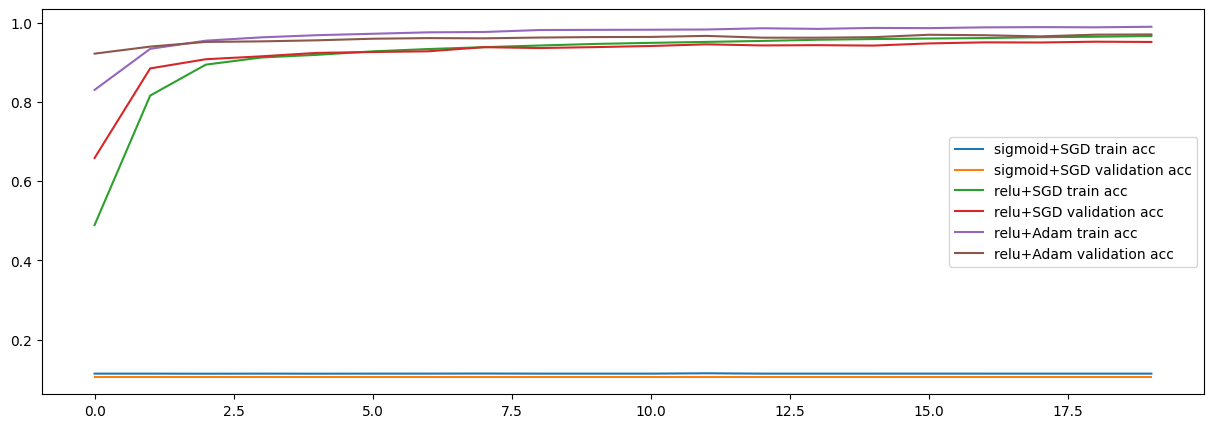

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
# sigmoid + SGD 조합
plt.plot(h1.history['accuracy'], label="sigmoid+SGD train acc")
plt.plot(h1.history['val_accuracy'], label="sigmoid+SGD validation acc")
# relu + SGD 조합
plt.plot(h2.history['accuracy'], label="relu+SGD train acc")
plt.plot(h2.history['val_accuracy'], label="relu+SGD validation acc")
# relu + Adam 조합
plt.plot(h3.history['accuracy'], label="relu+Adam train acc")
plt.plot(h3.history['val_accuracy'], label="relu+Adam validation acc")

plt.legend()
plt.show()

### callback 함수
- 모델저장 및 조기학습중단
- 모델저장 (ModelCheckPoint)
  - 딥러닝모델 학습시 지정된 epoch 를 다 끝내면 과대적합이 일어나는 경우가 있다 -> 중간에 일반화된 모델을 저장할 수 있는 기능!!
- 조기학습 중단(EarlyStopping)
  - epoch 를 크게 설정할 경우 일정횟수 이상으로는 모델의 성능이 개선되지 않는 경우가 있다.  -> 시간낭비 -> 모델의 성능이 개선되지 않는 경우에는 조기중단이 필요

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 모델 중간 저장
# 모델 중간 멈춤

In [12]:
# 모델 저장
# 저장될 경로 작성
model_path = '/content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm_{epoch:02d}_{val_accuracy:0.2f}.hdf5'
mckp = ModelCheckpoint(filepath = model_path, # 저장경로
                verbose = 1, # 로그 출력 -> 1: 로그출력 0
                save_best_only = True, # 모델성능이 최고점을 갱신할때마다 저장
                monitor = 'val_accuracy') #  최고점의 기준치
# 콜백객체 생성완료~
# 사용한것은 아님!

In [13]:
# 조기학습 중단
early = EarlyStopping(monitor = 'val_accuracy', #기준치
                      verbose = 1, # 로그출력
                      patience = 10) # 모델성능개선을 기다리는 최대 횟수

In [14]:
# 3 번째 조합으로 모델링
# 1)신경망설계
# 뼈대
model3 = Sequential()
# 입력층
# 사진데이터 (2차원 -> 1차원)
model3.add(Flatten())
# 중간층 (5층 (64,128,256,128,64))
model3.add(Dense(units = 64, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 256, activation = 'relu'))
model3.add(Dense(units = 128, activation = 'relu'))
model3.add(Dense(units = 64, activation = 'relu'))
# 출력층
model3.add(Dense(units = 10, activation = 'softmax'))

#2) 학습방법및 평가방법 설정
model3.compile(loss = 'sparse_categorical_crossentropy',
               optimizer = Adam(learning_rate = 0.001), #Adma 기본학습률: 0.001
               metrics = ['accuracy'])

h3 = model3.fit(X_train,y_train,epochs = 1000,
                validation_split=0.2,
                batch_size = 128,
                callbacks = [mckp, early])

Epoch 1/1000
375/375 [==============================] - ETA: 0s - loss: 1.0119 - accuracy: 0.8026
Epoch 1: val_accuracy improved from -inf to 0.90000, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm_01_0.90.hdf5
375/375 [==============================] - 7s 11ms/step - loss: 1.0119 - accuracy: 0.8026 - val_loss: 0.3360 - val_accuracy: 0.9000
Epoch 2/1000
 13/375 [>.............................] - ETA: 3s - loss: 0.2552 - accuracy: 0.9201

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


370/375 [============================>.] - ETA: 0s - loss: 0.2448 - accuracy: 0.9289
Epoch 2: val_accuracy improved from 0.90000 to 0.93008, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm_02_0.93.hdf5
375/375 [==============================] - 3s 9ms/step - loss: 0.2432 - accuracy: 0.9294 - val_loss: 0.2422 - val_accuracy: 0.9301
Epoch 3/1000
371/375 [============================>.] - ETA: 0s - loss: 0.1790 - accuracy: 0.9460
Epoch 3: val_accuracy improved from 0.93008 to 0.93983, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm_03_0.94.hdf5
375/375 [==============================] - 3s 7ms/step - loss: 0.1794 - accuracy: 0.9459 - val_loss: 0.1993 - val_accuracy: 0.9398
Epoch 4/1000
375/375 [==============================] - ETA: 0s - loss: 0.1412 - accuracy: 0.9575
Epoch 4: val_accuracy improved from 0.93983 to 0.95100, saving model to /content/drive/MyDrive/Colab Notebooks/DeepLearning/data/digit_model/dm